<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/Suavizado_exponencial_de_primer_orden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suavizado exponencial de primer orden**

El suavizado exponencial de primer orden o el suavizado exponencial simple son adecuados con varianza constante y sin estacionalidad. El enfoque generalmente se recomienda para realizar pronósticos a corto plazo. El Capítulo 2, Comprensión de los datos de series de tiempo, ha introducido el método ingenuo para el pronóstico donde la predicción en el horizonte h se define como el valor de t (o la última observación):
$$X_{t+h}=X_t$$

El enfoque se amplía mediante una media móvil simple, que amplía el enfoque ingenuo utilizando la media de múltiples puntos históricos:

$$X_{t+h}=\frac{1}{n} \sum_{i=1}^{n}X_t $$

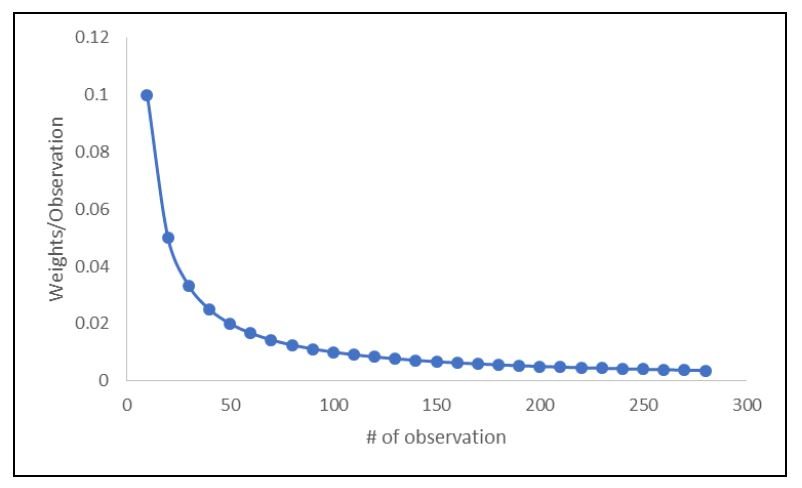

In [ ]:
#@title Peso asignado a la observación al aumentar el tamaño de la ventana

from IPython.display import Image
Image("/content/drive/MyDrive/imagenes/pic1.JPG")

A medida que aumenta el tamaño de la ventana para la media móvil, los pesos asignados a cada observación se hacen más pequeños. El exponencial de primer orden extiende este enfoque actual al proporcionar puntos de datos exponenciales a históricos donde los pesos disminuyen exponencialmente desde el punto de datos más reciente al más antiguo. El suavizado exponencial de primer orden se puede definir de la siguiente manera:
$$x_{t+1}=\alpha x_t+\alpha(1-\alpha)x_{t+1}+\alpha(1-\alpha)^2x_{t-1}+... $$

Aquí, $\alpha$ es el factor de suavizado entre $[0,1]$ y controla la velocidad a la que disminuyen los pesos y $x_t$ es el valor observado en el tiempo $t$. La siguiente figura para el proceso de suavizado demuestra la caída de pesos con un factor de suavizado diferente, $\alpha$:

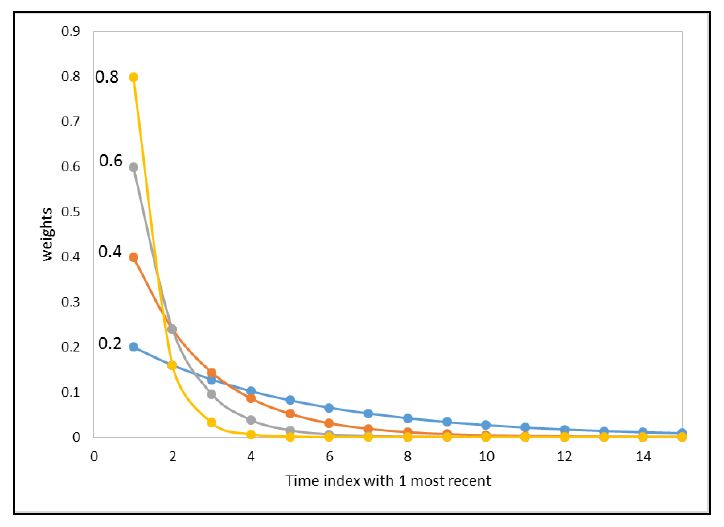

In [ ]:
#@title Ilustración de pesos asignados a diferentes valores alfa a observaciones históricas
from IPython.display import Image
Image("/content/drive/MyDrive/imagenes/pic2.JPG")

El valor más alto de α conduce a una disminución más rápida de los pesos; por lo tanto, los datos históricos tendrán menos impacto en el valor pronosticado. La ecuación de pronóstico para el suavizado exponencial de un solo orden se puede reducir aún más a lo siguiente:

$$F_1 = x_1$$

$$F_2 = \alpha x_1 + (1-α)F_1 = αx_1 + (1-α)x_1 = x_1$$

$$F_3 = αx_2 + (1-α)F_2$$
$$ ...$$
$$F_{t-1} = αx_t + (1-α)F_{t-1}$$

Here, $F_{t-1}$ is the forecasted value at time t and is represented as follows:
$$F_{t-1}=\alpha x_{t-2}+\alpha(1-\alpha)x_{t-3}+\alpha(1-\alpha)^2x_{t-4}+... $$

La forma reducida demuestra la relación del valor pronosticado del tiempo $t$ como función del valor pronosticado en el tiempo $t-1$ y la observación en el tiempo $t$. El pronóstico también se conoce como pronóstico de Holt-Winters.

Como puede verse en la ecuación anterior, al valor inicial del primer valor de pronóstico se le asigna un valor de observación en la primera instancia de tiempo, $F_1 = x_1$, y la segunda instancia de tiempo también toma el valor de la primera instancia. Otra opción para iniciar la previsión es utilizar el valor promedio de los datos disponibles o un subconjunto de los datos, de la siguiente manera:

$$F_1=\frac{1}{N} \sum_{i=1}^{N}x_i $$

El problema análogo de detectar el tamaño de la ventana y los pesos en el suavizado exponencial de promedio móvil requiere la optimización del parámetro de suavizado $α$. La selección correcta de α es muy crítica. Por ejemplo, la selección de $α = 0$ suavizará todos los valores al valor asignado inicial como se muestra:
$$F_{t+1} = F_{t-1}$$

De manera similar, $α = 1$ representa el caso menos suavizado de suavizado exponencial de la siguiente manera:
$$F_{t+1} = x_t$$
Tomemos un ejemplo de cierre de acciones comunes de IBM para pronosticar utilizando el método de suavizado único. El primer paso es cargar los módulos necesarios:

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

El ejemplo actual usará los módulos os, pandas, numpy y matplotlib de Python.

El conjunto de datos se carga en el entorno de Python usando pandasDataFrame:

In [ ]:
# Load Dataset
ibm_df = pd.read_csv("/content/drive/MyDrive/Base datos/ibm.txt")
ibm_df.head()


,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


Solo por conveniencia, cambiaremos el nombre de las columnas:

In [ ]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


En el método exponencial de suavizado único, los valores pronosticados se generan de la siguiente manera:
$$\hat x_0=x_0$$
$$\hat x_1=\alpha x_0+(1-\alpha)\hat x_0 $$
$$...$$
$$x_{t+1}=\alpha x_t+\alpha(1-\alpha)x_{t-1}+\alpha(1-\alpha)^2 x_{t-1}+... $$

La serie anterior se puede implementar en Python de la siguiente manera:

In [ ]:
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

ibm_df['SES'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)


La función single_exp_smoothing configurada con el valor pronosticado inicial se asigna como el primer valor de la serie. Primero evaluemos casos extremos de pronóstico con $α = 0$ y $α = 1$:

In [ ]:
ibm_df["SES0"] = single_exp_smoothing(ibm_df["Close_Price"], 0)
ibm_df["SES1"] = single_exp_smoothing(ibm_df["Close_Price"], 1)

Text(0.5, 1.0, 'Alpha 1')

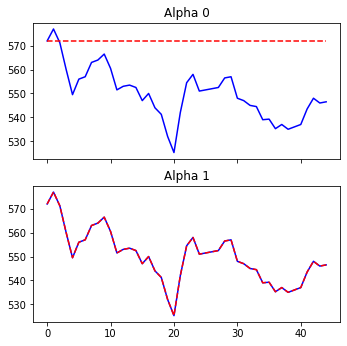

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES0'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES1'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 1')

La figura anterior ilustra que, en $α = 0$, el valor pronosticado es una constante, y para $α = 1$, la serie pronosticada se desplaza 1 rezago de tiempo. El pronóstico de suavizado único para un valor de suavizado 0,2 se puede evaluar de la siguiente manera:

Text(0.5, 1.0, 'Single Exponential Smoothing')

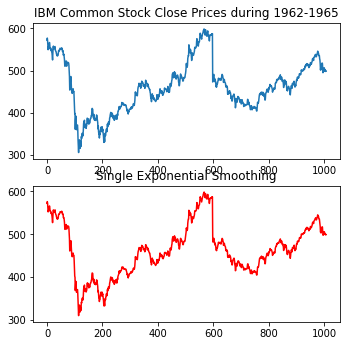

In [ ]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df["Close_Price"].plot(ax=ax)
ax.set_title("IBM Common Stock Close Prices during 1962-1965")
ax = fig.add_subplot(2,1,2)
ibm_df["SES"].plot(ax=ax, color="r")
ax.set_title("Single Exponential Smoothing")
#plt.savefig('plots/ch2/B07887_02_14.png', format='png', dpi=300)


La precisión del modelo se puede evaluar en una muestra reservada utilizando funciones objetivas estándar como el **error cuadrático medio (MSE) o el error absoluto medio (MAS)**:
$$MSE=\frac{1}{N} \sum_{i=1}^{N}(x_t-F_t)^2 $$

Del mismo modo, la **MAS** se evalúa de la siguiente manera:

$$MAD=\frac{1}{N} \sum_{i=1}^{N} |x_t-F_t| $$

Evaluemos el efecto de α en el ajuste. Para evaluarlo, se desarrollan múltiples modelos utilizando diferentes parámetros de suavizado, como se muestra aquí:

In [ ]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
ibm_df['SES2']  = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8)

Text(0.5, 1.0, 'Alpha 0.8')

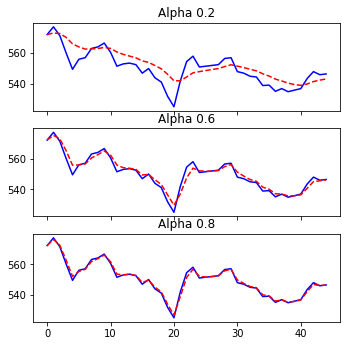

In [ ]:
# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
#plt.savefig('plots/ch2/B07887_02_15.png', format='png', dpi=300)



La figura anterior ilustra que alfa tiene un gran impacto en la previsión; por lo tanto, obtener el valor alfa correcto es fundamental al configurar la previsión. 

Como el suavizado ayuda a reducir la varianza del conjunto de datos, reducirá la varianza de las series pronosticadas entre cero y la varianza real del conjunto de datos:
$$Var(F_t)=var(\alpha \sum_{i=1}^{\infty}(1-\alpha)^t X_{T-1}) $$
Resolver la ecuación anterior conducirá a la siguiente varianza:
$$var(F_T)=\frac{\alpha}{2- \alpha} var(x_T) $$

Aquí, T es la longitud de la serie de tiempo. Para la varianza unitaria de la serie xT, la varianza capturada por la serie pronosticada variará según el parámetro de suavizado $\alpha$.